In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,r2_score



df = pd.read_csv("heart_disease.csv")  


numeric_features = [ 'trestbps', 'thalach', 'oldpeak']
binary_features = ['sex', 'fbs', 'exang']  
categorical_features = ['cp', 'restecg', 'thal']


X = df.drop(columns=['target', 'chol'])  


y_class = df['target']
y_reg = df['chol']


X_train, X_test, y_train_class, y_test_class, y_train_reg, y_test_reg = train_test_split(
    X, y_class, y_reg, test_size=0.2, stratify=y_class, random_state=42
)


preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')




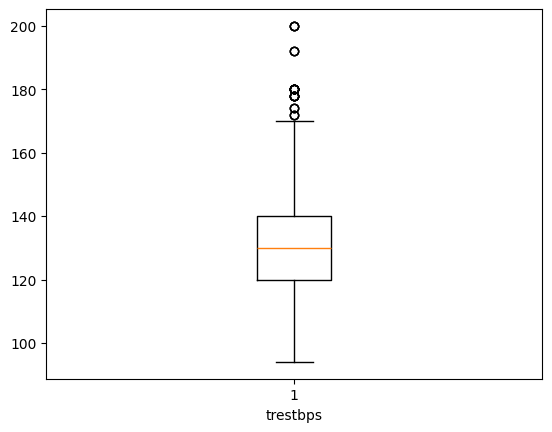

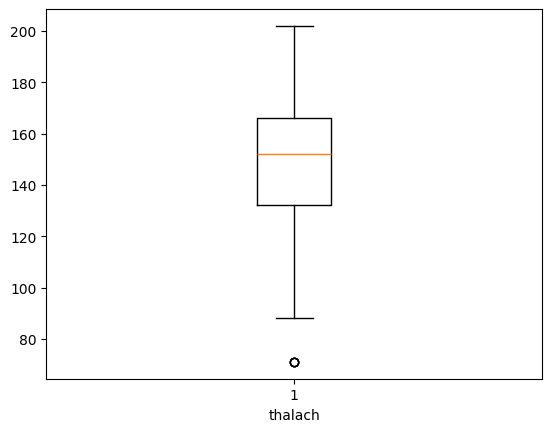

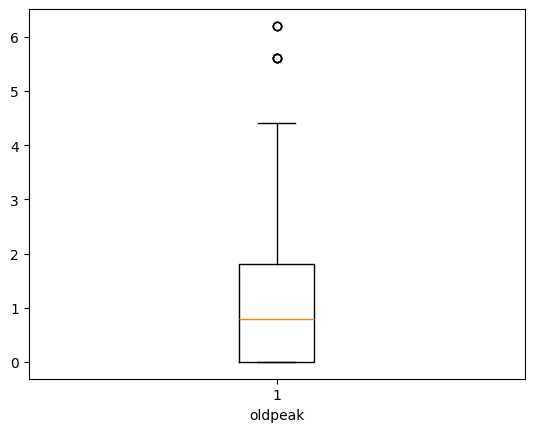

In [90]:
import matplotlib.pyplot as plt
for feature in numeric_features:
    plt.boxplot(df[feature])
    plt.xlabel(feature)
    plt.show()
    

In [91]:
def handle_outliers(data,col_name):
    q1=data[col_name].quantile(0.25)
    q3=data[col_name].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    data[col_name]=data[col_name].clip(upper=ub)
    data[col_name]=data[col_name].clip(lower=lb)
    return data[col_name]

In [92]:
for feature in numeric_features:
    df[feature]=handle_outliers(df,feature)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [93]:
linear_reg=Pipeline(steps=[
    ('pre',preprocessor),
    ('mod',LinearRegression())
])
linear_reg.fit(X_train,y_train_reg)
y_pred_lr_reg=linear_reg.predict(X_test)

In [94]:
svm=Pipeline(steps=[
    ('pre',preprocessor),
    ('mod',SVR(kernel='linear'))
])
svm.fit(X_train,y_train_reg)
y_pred_svm=svm.predict(X_test)

In [95]:
randomfor=Pipeline(steps=[
    ('pre',preprocessor),
    ('mod',RandomForestRegressor())
])
randomfor.fit(X_train,y_train_reg)
y_pred_rf=randomfor.predict(X_test)
from sklearn.metrics import mean_absolute_error

In [96]:
metric=pd.DataFrame(columns=['model','MSE','MAE','R2'])
metric.loc[len(metric)]=['linear regression',mean_squared_error(y_pred_lr_reg,y_test_reg),mean_absolute_error(y_pred_lr_reg,y_test_reg),r2_score(y_pred_lr_reg,y_test_reg)]
metric.loc[len(metric)]=['SVM',mean_squared_error(y_pred_svm,y_test_reg),mean_absolute_error(y_pred_svm,y_test_reg),r2_score(y_pred_svm,y_test_reg)]
metric.loc[len(metric)]=['Random forest',mean_squared_error(y_pred_rf,y_test_reg),mean_absolute_error(y_pred_rf,y_test_reg),r2_score(y_pred_rf,y_test_reg)]

In [97]:
metric

,model,MSE,MAE,R2
0,linear regression,2354.420505,36.769650,-6.255024
1,SVM,2356.840429,36.122972,-9.258824
2,Random forest,209.541822,8.353512,0.894435


In [98]:
log_lr=Pipeline(steps=[
    ('pre',preprocessor),
    ('mod',LogisticRegression(max_iter=1000))
])
log_lr.fit(X_train,y_train_class)
y_pred_log=log_lr.predict(X_test)

In [99]:
knn=Pipeline(steps=[
    ('pre',preprocessor),
    ('mod',KNeighborsClassifier(n_neighbors=5))
])
knn.fit(X_train,y_train_class)
y_pred_knn=knn.predict(X_test)

In [100]:
randomfore=Pipeline(steps=[
    ('pre',preprocessor),
    ('mod',RandomForestClassifier(n_estimators=100,max_depth=7))
])
randomfore.fit(X_train,y_train_class)
y_pred_rf_class=randomfore.predict(X_test)

In [101]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
metric1=pd.DataFrame(columns=['model','Accuracy','Precision','Recall','F1 score'])
metric1.loc[len(metric1)]=['logistic regression',accuracy_score(y_pred_log,y_test_class),precision_score(y_pred_log,y_test_class),recall_score(y_pred_log,y_test_class),f1_score(y_pred_log,y_test_class)]
metric1.loc[len(metric1)]=['knn ',accuracy_score(y_pred_knn,y_test_class),precision_score(y_pred_knn,y_test_class),recall_score(y_pred_knn,y_test_class),f1_score(y_pred_knn,y_test_class)]
metric1.loc[len(metric1)]=['random forest classifier',accuracy_score(y_pred_rf_class,y_test_class),precision_score(y_pred_rf_class,y_test_class),recall_score(y_pred_rf_class,y_test_class),f1_score(y_pred_rf_class,y_test_class)]


In [102]:
metric1

,model,Accuracy,Precision,Recall,F1 score
0,logistic regression,0.829268,0.904762,0.791667,0.844444
1,knn,0.843902,0.819048,0.868687,0.843137
2,random forest classifier,0.970732,0.961905,0.980583,0.971154


###

### FOR regression
#### Random Forest is the best model(R2 Score-0.8978)

### For classification
#### Random Forest is the best model(recall score-0.9809)